### This Notebook contains code to Clean and preprocess our data given to predict house prices.

In [1]:
# importing the standard libraries for a Machine Learning Problem.
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading the test and training data and concatenating them in order to apply same changes to them and to miss any outliers.
train = pd.read_csv(r"C:\Users\hp\Desktop\house price\New folder\train.csv")
test = pd.read_csv(r"C:\Users\hp\Desktop\house price\New folder\test.csv")

In [3]:
df = pd.concat((train, test), axis = 0)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


### Now we do basic data cleaning by dealing with missing values or NAN values, converting textual data into usable form and to handle categorical Data.

In [4]:
# NAN values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

### Here it is observed that few columns have much greater number of missing values than non null ones. They cannot help fit our model better on first go. So we basically drop them and if felt the need we would visit them again.
### list = (Alley, PoolQC, Fence, MiscFeature) 
### These columns are gonna be dropped from our dataframe.

In [5]:
df.drop(['Alley'], axis=1, inplace = True)
df.drop(['PoolQC'], axis=1, inplace = True)
df.drop(['MiscFeature'], axis=1, inplace = True)
df.drop(['Fence'], axis=1, inplace = True)

In [7]:
# Initially df shape was: (2919 rows × 81 columns)
df.shape

(2919, 77)

### So Now there are only 77 columns left in df DataFrame.
### Now we visualise heatmap for our null values.

<AxesSubplot:>

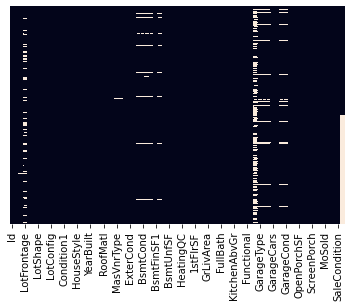

In [8]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False)

### We have to make a list of all the columns which contain null values and replace the null values with the mode if data is categorical otherwise with the mean of that column.

In [9]:
# This is a list of columns which have categorical data and their null value cannot be replaced with the mean.

cat_lis = ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive', 'YrSold']

lis = df.columns.tolist()

for col in lis:
    if col in cat_lis:
        df[col] = df[col].fillna(df[col].mode()[0])
    elif col != 'SalePrice':
        df[col] = df[col].fillna(df[col].mean())

<AxesSubplot:>

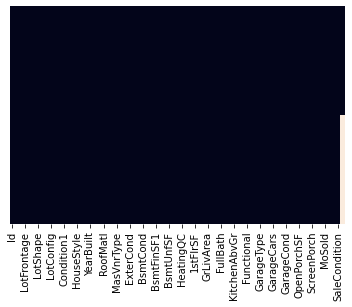

In [10]:
# We create a heatmap to make sure we did not missed any column.
sns.heatmap(df.isnull(), yticklabels = False, cbar = False)

### Once we dealt with Null values, now we have to make sense out of the categorical data too. In this problem all the categorical data given to us the nominal categorical data, so we use one hot encoding or make dummy variables with binary digits as its value.

In [11]:
def one_hot_encod(col):
    df_final = df
    i = 0
    for field in col:
        df1 = pd.get_dummies(df[field], drop_first = True)
        df.drop([field], axis = 1, inplace = True)
        
        if i == 0:
            df_final = df1.copy()
        else:
            df_final = pd.concat([df_final, df1], axis = 1)
        i += 1
    df_final = pd.concat([df_final, df], axis = 1)
    return df_final

df_final = one_hot_encod(cat_lis)
df_final

,FV,RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
0,0,0,1,0,1,0,0,1,0,0,...,548.0,0,61,0,0,0,0,0,2,208500.0
1,0,0,1,0,1,0,0,1,0,0,...,460.0,298,0,0,0,0,0,0,5,181500.0
2,0,0,1,0,1,0,0,0,0,0,...,608.0,0,42,0,0,0,0,0,9,223500.0
3,0,0,1,0,1,0,0,0,0,0,...,642.0,0,35,272,0,0,0,0,2,140000.0
4,0,0,1,0,1,0,0,0,0,0,...,836.0,192,84,0,0,0,0,0,12,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0,0,1,1,0,0,1,0,0,...,0.0,0,0,0,0,0,0,0,6,NaN
1455,0,0,0,1,1,0,0,1,0,0,...,286.0,0,24,0,0,0,0,0,4,NaN
1456,0,0,1,0,1,0,0,1,0,0,...,576.0,474,0,0,0,0,0,0,9,NaN
1457,0,0,1,0,1,0,0,1,0,0,...,0.0,80,32,0,0,0,0,700,7,NaN


### We need to make sure that no two columns are identical. So if there are any duplicate columns we drop them.

In [12]:
df_final = df_final.loc[:, ~df_final.columns.duplicated()]
df_final

,FV,RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
0,0,0,1,0,1,0,0,1,0,0,...,548.0,0,61,0,0,0,0,0,2,208500.0
1,0,0,1,0,1,0,0,1,0,0,...,460.0,298,0,0,0,0,0,0,5,181500.0
2,0,0,1,0,1,0,0,0,0,0,...,608.0,0,42,0,0,0,0,0,9,223500.0
3,0,0,1,0,1,0,0,0,0,0,...,642.0,0,35,272,0,0,0,0,2,140000.0
4,0,0,1,0,1,0,0,0,0,0,...,836.0,192,84,0,0,0,0,0,12,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0,0,1,1,0,0,1,0,0,...,0.0,0,0,0,0,0,0,0,6,NaN
1455,0,0,0,1,1,0,0,1,0,0,...,286.0,0,24,0,0,0,0,0,4,NaN
1456,0,0,1,0,1,0,0,1,0,0,...,576.0,474,0,0,0,0,0,0,9,NaN
1457,0,0,1,0,1,0,0,1,0,0,...,0.0,80,32,0,0,0,0,700,7,NaN


In [13]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 181 entries, FV to SalePrice
dtypes: float64(12), int64(25), uint8(144)
memory usage: 1.2 MB


### There is no column left with the textual pattern values or values in form that cannot be used directly in our model.
### So we again split the training and test datasets and store them as csv files.

In [14]:
df_final_train = df_final.iloc[:1460]
df_final_test = df_final[1460:]
           
df_final_train.to_csv(r"C:\Users\hp\Desktop\house price\New folder\jupiter_notebook\basic_cleaned_train1.csv", index = False)  
df_final_test.to_csv(r"C:\Users\hp\Desktop\house price\New folder\jupiter_notebook\basic_cleaned_test1.csv", index = False)